## Customer Churn Telecom Project

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

## Installing Libraries and Downloading Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
import pandas as pd
import zipfile
import os
import requests

url = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-eng/datasets/final_provider.zip'
zip_path = 'final_provider.zip'
extract_dir = 'data'

if not os.path.exists(extract_dir):
    os.makedirs(extract_dir, exist_ok=True)
    r = requests.get(url)
    with open(zip_path, 'wb') as f:
        f.write(r.content)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

base_path = 'data/final_provider/'

contract = pd.read_csv(base_path + 'contract.csv')
personal = pd.read_csv(base_path + 'personal.csv')
internet = pd.read_csv(base_path + 'internet.csv')
phone = pd.read_csv(base_path + 'phone.csv')


In [6]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [7]:
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [8]:
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [9]:
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


We have four datasets, all linked by customerID. We will merge those datasets together for our model so that we have more features to increase accuray.

In [11]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [12]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [13]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


We don't have any null values in any of our dataframes, which is good. After merging the dataframes, we will want to check again for any null or duplicate values creating by merging the information.

## Work Plan

Step 1: Data Merging and Cleaning
Merge the four datasets on customerID to create a single master dataframe. Check again for nulls post-merge and handle missing values appropriately. Convert data types and format categorical variables where necessary.

Step 2: Feature Engineering
Encode categorical variables, create new features if relevant. Normalize or scale features as needed.

Step 3: Model Training and Evaluation
Split data into training and test sets. Assess performance and tune hyperparameters. Evaluate models using accuracy and ROC-AUC.

Step 4: Final Model & Deployment Considerations
Select the best-performing model and present final scores and conclusion.

## Cleaning Up Data

We will start by downloading and merging the data.

In [19]:
df = contract.merge(personal, on="customerID", how="left") \
             .merge(internet, on="customerID", how="left") \
             .merge(phone, on="customerID", how="left")

We will now check for null values and duplicates.

In [21]:
nulls = df.isnull().sum()
nulls

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


Our null values come from customers that don't have either the internet plan or phone plan. We will make new columns that show if that customer has internet or phone or not, because that could be a cause of churn.

In [24]:
df['HasInternetService'] = df['InternetService'].notnull().astype(int)

internet_service_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                         'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in internet_service_cols:
    df[col] = df[col].fillna('No')

In [25]:
df['HasPhoneService'] = df['MultipleLines'].notnull().astype(int)
df['MultipleLines'] = df['MultipleLines'].fillna('No')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7043 non-null   object 
 1   BeginDate           7043 non-null   object 
 2   EndDate             7043 non-null   object 
 3   Type                7043 non-null   object 
 4   PaperlessBilling    7043 non-null   object 
 5   PaymentMethod       7043 non-null   object 
 6   MonthlyCharges      7043 non-null   float64
 7   TotalCharges        7043 non-null   object 
 8   gender              7043 non-null   object 
 9   SeniorCitizen       7043 non-null   int64  
 10  Partner             7043 non-null   object 
 11  Dependents          7043 non-null   object 
 12  InternetService     7043 non-null   object 
 13  OnlineSecurity      7043 non-null   object 
 14  OnlineBackup        7043 non-null   object 
 15  DeviceProtection    7043 non-null   object 
 16  TechSu

We have handled our null values. We will now check for duplicates.

In [28]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,HasInternetService,HasPhoneService


No duplicates. 

In [30]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,HasInternetService,HasPhoneService
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,DSL,No,Yes,No,No,No,No,No,1,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,1,1
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,1,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,No,1,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,Fiber optic,No,No,No,No,No,No,No,1,1


We will now convert columns to appropriate data types before moving on to step 2.

In [32]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\joshf\AppData\Local\Temp\ipykernel_33876\266577964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [33]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')

today = pd.to_datetime("2020-01-01")

df['ActualEndDate'] = df['EndDate'].fillna(today)
df['TenureMonths'] = (df['ActualEndDate'] - df['BeginDate']) // pd.Timedelta(days=30)

C:\Users\joshf\AppData\Local\Temp\ipykernel_33876\492274757.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')


In [34]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

In [35]:
yes_no_cols = ['Partner', 'Dependents', 'PaperlessBilling',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in yes_no_cols:
    df[col] = df[col].map({'Yes': True, 'No': False})

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customerID          7043 non-null   object        
 1   BeginDate           7043 non-null   datetime64[ns]
 2   EndDate             1869 non-null   datetime64[ns]
 3   Type                7043 non-null   object        
 4   PaperlessBilling    7043 non-null   bool          
 5   PaymentMethod       7043 non-null   object        
 6   MonthlyCharges      7043 non-null   float64       
 7   TotalCharges        7043 non-null   float64       
 8   gender              7043 non-null   object        
 9   SeniorCitizen       7043 non-null   bool          
 10  Partner             7043 non-null   bool          
 11  Dependents          7043 non-null   bool          
 12  InternetService     7043 non-null   object        
 13  OnlineSecurity      7043 non-null   bool        

## Exploratory Data Analysis

We will add a new church column, which will be our target column. This will be a 0 if the EndDate is NaT, meaning they are a current customer. Or 1 if there is an end date, meaning the customer has left.

In [39]:
df['Churn'] = df['EndDate'].notna().astype(int)

In [40]:
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


About 73% of customers are current customers.

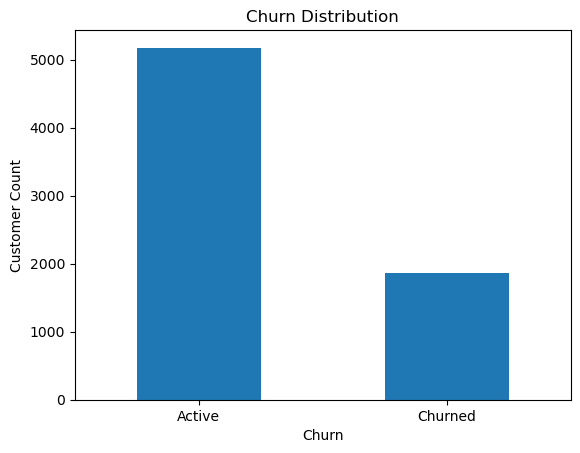

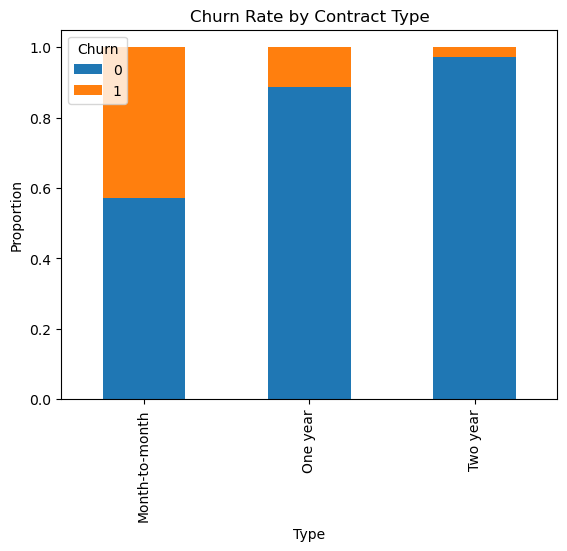

In [42]:
import matplotlib.pyplot as plt
df['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xticks([0, 1], labels=["Active", "Churned"], rotation=0)
plt.ylabel("Customer Count")
plt.show()

df.groupby('Type')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion")
plt.show()

From our EDA, we can see that shorter-term customers are more likely to church. One Year customers churn more often than Two Year customers, with Month-to-month customers being the most likely to church by a large amount.

## Feature Engineering

We will now prepare our features for our models.

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop(columns=['customerID', 'BeginDate', 'EndDate', 'ActualEndDate', 'Churn'])

y = df['Churn']

categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


## Model Training

Time to train and evaluate our model.

AUC-ROC Score: 0.8574
Accuracy: 0.8141

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.68      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



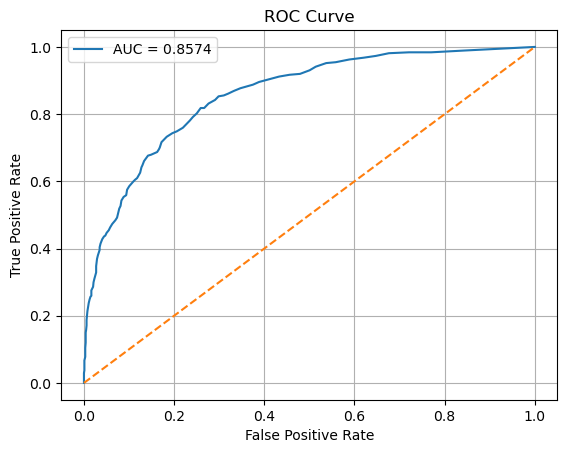

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1] 

auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {auc_score:.4f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


Our AUC-ROC score is just over .85, which isn't bad, but can probably be better. That puts us in the 5 SP range, but we'll see if we can get closer to the top target goal of over .88. We'll try creating an extra feature that examines tenure and fine tune our parameters.

In [51]:
df['TenureGroup'] = pd.cut(df['TenureMonths'],
                           bins=[-1, 6, 12, 24, 48, 72, 100],
                           labels=['<6m', '6-12m', '1-2y', '2-4y', '4-6y', '6+y'])

In [52]:
!pip install xgboost

In [54]:
!pip install --upgrade xgboost

In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

neg, pos = y_train.value_counts()
scale = neg / pos

xgb = XGBClassifier(
    n_estimators=500, 
    learning_rate=0.05, 
    max_depth=6,            
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale,
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'
)

xgb.fit(
    X_train_prepared, y_train,
    eval_set=[(X_test_prepared, y_test)],
    verbose=False
)

y_proba = xgb.predict_proba(X_test_prepared)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {auc:.4f}")


C:\Users\joshf\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:22:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUC-ROC Score: 0.8919


We improved our score to .89, over our target, so we are good to move on to final testing.

## Final Model, Testing, and Conclusion

In [66]:
X_all_prepared = preprocessor.fit_transform(X)
y_all = y

final_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale,
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'
)

final_model.fit(X_all_prepared, y_all)

C:\Users\joshf\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:23:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [68]:
import joblib

joblib.dump(final_model, 'final_xgb_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')


['preprocessor.pkl']

In [70]:
from sklearn.model_selection import train_test_split

X_train_sim, X_test_sim, y_train_sim, y_test_sim = train_test_split(
    X, y, test_size=0.1, random_state=99, stratify=y
)

X_train_sim_prep = preprocessor.fit_transform(X_train_sim)
X_test_sim_prep = preprocessor.transform(X_test_sim)

model = XGBClassifier(
    n_estimators=final_model.get_params()['n_estimators'],  # use best number
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale,
    random_state=99,
    use_label_encoder=False,
    eval_metric='auc'
)

model.fit(X_train_sim_prep, y_train_sim)

from sklearn.metrics import roc_auc_score

y_proba_sim = model.predict_proba(X_test_sim_prep)[:, 1]
auc = roc_auc_score(y_test_sim, y_proba_sim)
print(f"Final Test AUC-ROC: {auc:.4f}")

C:\Users\joshf\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:24:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final Test AUC-ROC: 0.9024


We ended up with a final AUC-ROC score of 0.9024, which beats our original goal of 0.88. This model should help the business spot customers who are likely to churn so we can send them targeted offers like promo codes to encourage them to stay.